In [133]:
import pandas as pd
from __future__ import print_function
import numpy as np #importamos para poder utilizar random.choice

In [134]:
humandata = pd.read_csv('juego_azar.csv',delimiter=';')

In [135]:
humandatalength,humancolumnslength = humandata.shape
humandata.head()

,DRAW_ID,N1,N2,N3,N4,N5
0,1,2,14,21,36,46
1,2,13,25,32,38,46
2,3,1,6,13,17,26
3,4,10,13,20,33,41
4,5,10,15,17,40,45


In [136]:
randomdata = []
for i in range(humandatalength):
    randomdata.append(sorted.random.choice(50, 5, replace=False)+1)
randomdata = np.array(randomdata)
randomdata = pd.DataFrame(randomdata,
                         index = [i+ humandatalength for i in range(humandatalength)],
                         columns = ['N1','N2','N3','N4','N5'])

In [137]:
#mostramos las combinaciones random
print(randomdata)

     N1  N2  N3  N4  N5
300  36  25   8  32  29
301  39  49  44   8  10
302  48  29  15  38  47
303  26  48  30  45   5
304  33  47  32  37  10
..   ..  ..  ..  ..  ..
595  28   4  12   1   7
596   2  18  20  38  26
597  11  29  10  43  40
598  49  32  29  10   8
599  44  41  18  50  29

[300 rows x 5 columns]


In [138]:
#mostramos las combinaciones humanas
print(humandata)

     DRAW_ID  N1  N2  N3  N4  N5
0          1   2  14  21  36  46
1          2  13  25  32  38  46
2          3   1   6  13  17  26
3          4  10  13  20  33  41
4          5  10  15  17  40  45
..       ...  ..  ..  ..  ..  ..
295      296  13  14  21  27  39
296      297   4   9  10  30  40
297      298   1   6  10  12  31
298      299   3  30  42  45  49
299      300  16  36  43  44  50

[300 rows x 6 columns]


In [139]:
humangroup= humandata.groupby(['N1','N2','N3','N4','N5'])
groupsize = humangroup.size();
groupsize.sort_values(ascending=False)
print(groupsize)

N1  N2  N3  N4  N5
1   2   6   20  36    1
        11  27  29    1
        18  31  36    1
    3   16  24  37    1
    4   7   10  50    1
                     ..
28  30  42  45  49    1
29  33  39  41  44    1
31  32  38  40  42    1
    33  34  37  40    1
            39  45    1
Length: 300, dtype: int64


(array([ 6.,  9., 17., 10.,  8.]),
 array([19. , 23.2, 27.4, 31.6, 35.8, 40. ]),
 <a list of 5 Patch objects>)

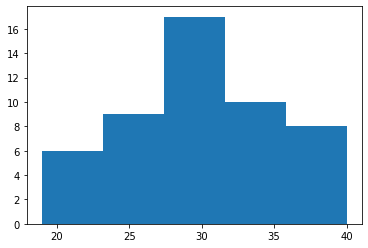

In [140]:
import matplotlib.pyplot as plt
freq = []

for val in range(50):
    count = ((humandata['N1']==val +1).sum()+
            (humandata['N2']==val +1).sum()+
            (humandata['N3']==val +1).sum()+
            (humandata['N4']==val +1).sum()+
            (humandata['N5']==val +1).sum())
    freq.append(count)

plt.hist(freq, bins=5)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [142]:
#vamos a predecir N1
y = humandata['N1']
#se crean los set de entrenamiento y prueba, 20% de prueba
X_train, X_test, y_train, y_test = train_test_split(humandata,y, test_size=0.2)

In [143]:
model = RandomForestClassifier(n_estimators= 250)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [144]:
y_pred= model.predict(X_test)
y_preddf = pd.DataFrame(y_pred)
y_preddf

,0
0,10
1,7
2,16
3,13
4,5
5,13
6,4
7,12
8,4
9,21


In [145]:
from sklearn import metrics
print("Score:",metrics.f1_score(y_test, y_pred, average='macro'))

Score: 0.5461309523809523
